In [1]:
#PDR land value map

In [2]:
import pandas as pd
import requests
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
landvaluedata = gpd.read_file('filteredpdr4.csv')

In [4]:
landvaluedata.sample(n=5)

,field_1,Unnamed: 0,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,geometry,zoning_x,parcelno2,zoning_y,buildingsf,landarea,landvalue,finzone2,geometry
561,91169,91169,91166,5318033,0,0,RETAIL/ENT,0,2479.19690266,PDR-1-B,True,MULTIPOLYGON (((-122.39868947537634 37.7392039...,PDR-1-B,5318033,RH2,0.0,2495.0,318311.0,PDR-1-B,MULTIPOLYGON (((-122.39868947537634 37.7392039...
573,91234,91234,91243,5348017B,0,8020,PDR,5250,5973.37737329,PDR-2,True,MULTIPOLYGON (((-122.40316934223387 37.7385707...,PDR-2,5348017B,M1,0.0,5998.0,282037.0,PDR-2,MULTIPOLYGON (((-122.40316934223387 37.7385707...
192,85370,85370,85355,3530001,4000,11661,PDR,11661,7814.6980127000015,PDR-1-G,True,MULTIPOLYGON (((-122.41604196759826 37.7694214...,PDR-1-G,3530001,M1,4000.0,7749.0,420415.0,PDR-1-G,MULTIPOLYGON (((-122.41604196759826 37.7694214...
1425,152470,152470,152468,5313018,0,4199,PDR,4199,7470.89434535,PDR-2,True,MULTIPOLYGON (((-122.39516007615214 37.7381427...,PDR-2,5313018,M1,0.0,7496.0,405234.0,PDR-2,MULTIPOLYGON (((-122.39516007615214 37.7381427...
1043,103190,103190,103168,5240043,14000,24709,MIPS,0,15957.146232700004,PDR-1-B,True,MULTIPOLYGON (((-122.3835835114368 37.73913783...,PDR-1-B,5240043,M1,14000.0,16000.0,94043.0,PDR-1-B,MULTIPOLYGON (((-122.3835835114368 37.73913783...


In [5]:
#Fixing glitch where geometry column is repeated

In [6]:
fixeddata = gpd.read_file("filteredpdr4.csv", GEOM_POSSIBLE_NAMES="geometry", KEEP_GEOM_COLUMNS="NO")

In [7]:
fixeddata.head()

,field_1,Unnamed: 0,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,active,zoning_x,parcelno2,zoning_y,buildingsf,landarea,landvalue,finzone2,geometry
0,14738,14738,14710,4793001B,5500,0,PDR,0,5484.87963388,PDR-2,True,PDR-2,4793001B,M1,5500.0,5500.0,905415.0,PDR-2,(POLYGON ((-122.3817284669459 37.7254965541782...
1,14739,14739,14711,4357004,4873,13365,MIXED,6003,13603.9931126,PDR-2,True,PDR-2,4357004,M2,11300.0,12000.0,2927400.0,PDR-2,(POLYGON ((-122.3857430700783 37.7502624526935...
2,69874,69874,69851,3552009,0,0,RETAIL/ENT,0,18324.895471400006,PDR-1-G,True,PDR-1-G,3552009,M1,0.0,18375.0,700157.0,PDR-1-G,(POLYGON ((-122.4155249528884 37.7660867626118...
3,69876,69876,69853,3552013,0,5000,PDR,0,13212.4986738,PDR-1-G,True,PDR-1-G,3552013,PDR1G,0.0,13198.0,155228.0,PDR-1-G,(POLYGON ((-122.416512918655 37.76535232313464...
4,69933,69933,69911,3551003,23522,8020,MIXED,3272,17571.244674200007,PDR-1-G,True,PDR-1-G,3551003,M1,23522.0,17458.0,1062960.0,PDR-1-G,(POLYGON ((-122.4132809887289 37.7655474018695...


In [8]:
#mapping with geoplot
%%capture
!pip install geoplot;



UsageError: Line magic function `%%capture` not found.


In [9]:
import geoplot

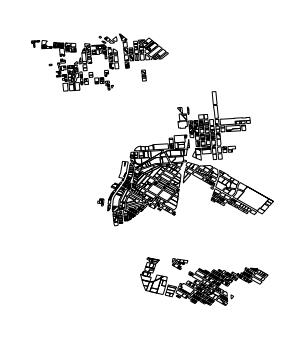

In [10]:
geoplot.polyplot(fixeddata)

plt.show()

In [12]:
fixeddata["landvalue2"] = pd.to_numeric(fixeddata["landvalue"], downcast="float")

In [13]:
fixeddata.loc[fixeddata['landvalue2'].isnull()] = -1 

In [14]:
#Converting land value to integers
fixeddata['landvalue3'] = fixeddata['landvalue2'].astype(float)

In [15]:
fixeddata.sample(n=10)

,field_1,Unnamed: 0,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,...,zoning_x,parcelno2,zoning_y,buildingsf,landarea,landvalue,finzone2,geometry,landvalue2,landvalue3
758,94000,94000,93991,4290017,1995,0,PDR,0,3231.05418983,PDR-2,...,PDR-2,4290017,M2,1995.0,3250.0,397288.0,PDR-2,(POLYGON ((-122.3930611383592 37.7521932109741...,397288.0,397288.0
1257,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0
70,81251,81251,81235,3572031,6114,5499,MIXED,2531,3301.68329148,PDR-1-G,...,PDR-1-G,3572031,M1,6114.0,3255.0,514524.0,PDR-1-G,(POLYGON ((-122.4147966656776 37.7638026293561...,514524.0,514524.0
386,88799,88799,88796,4909025,6000,0,PDR,0,5953.14646443,PDR-1-B,...,PDR-1-B,4909025,M1,6000.0,6000.0,277515.0,PDR-1-B,(POLYGON ((-122.3891692905363 37.7215142500113...,277515.0,277515.0
257,87011,87011,87003,5246053,40000,17246,PDR,15000,48934.1993937,PDR-2,...,PDR-2,5246053,M1,40000.0,48617.0,4349330.0,PDR-2,(POLYGON ((-122.3958169195631 37.7462224997773...,4349330.0,4349330.0
688,92749,92749,92743,4025001,0,0,VACANT,0,5031.20093653,PDR-1-G,...,PDR-1-G,4025001,M1,0.0,4996.0,59096.0,PDR-1-G,(POLYGON ((-122.4073231164067 37.7615612017354...,59096.0,59096.0
414,89143,89143,89144,4879022,3250,20000,PDR,20000,8040.13104386,PDR-2,...,PDR-2,4879022,PDR2,3250.0,8000.0,475309.0,PDR-2,(POLYGON ((-122.3900674691425 37.7239222728067...,475309.0,475309.0
254,87008,87008,87000,5242031,0,0,VACANT,0,10920.4898468,PDR-2,...,PDR-2,5242031,M1,0.0,10750.0,96284.0,PDR-2,(POLYGON ((-122.3877374621159 37.7414996388642...,96284.0,96284.0
974,102370,102370,102347,4171020,49030,13090,MIPS,0,57016.3690264,PDR-1-G,...,PDR-1-G,4171020,M2,49030.0,57995.0,3395319.0,PDR-1-G,(POLYGON ((-122.389158224906 37.75541875950915...,3395319.0,3395319.0
1256,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1.0


In [19]:
cleandata = fixeddata.loc[fixeddata.geometry != -1]

In [20]:
cleandata.sample(n=10)

,field_1,Unnamed: 0,objectid,blklot,bldgsf,totuses,landuse,pdr,parcelarea,zoning_code,...,zoning_x,parcelno2,zoning_y,buildingsf,landarea,landvalue,finzone2,geometry,landvalue2,landvalue3
523,90746,90746,90744,5350016,0,0,MISSING DATA,0,2479.19005824,PDR-2,...,PDR-2,5350016,M1,0.0,2500.0,77453.0,PDR-2,(POLYGON ((-122.4033015055833 37.7377010195752...,77453.0,77453.0
1208,107874,107874,107856,5583014,6000,0,PDR,0,21017.3331789,PDR-2,...,PDR-2,5583014,M1,6000.0,20311.25,697689.0,PDR-2,(POLYGON ((-122.4050072476522 37.7393333288955...,697689.0,697689.0
338,88000,88000,87999,4883028,5000,2660,RETAIL/ENT,0,4974.9942419,PDR-2,...,PDR-2,4883028,M1,5000.0,5000.0,155388.0,PDR-2,(POLYGON ((-122.3882648353422 37.7216084722709...,155388.0,155388.0
1121,104273,104273,104256,5302056,43200,24454,PDR,24454,46969.983933,PDR-2,...,PDR-2,5302056,M1,43200.0,47980.0,1431005.0,PDR-2,(POLYGON ((-122.3971646614736 37.7402090606735...,1431005.0,1431005.0
1336,140367,140367,140363,4343001G,9950,15000,PDR,15000,15783.968238100002,PDR-2,...,PDR-2,4343001G,M2,9950.0,15860.0,727618.0,PDR-2,(POLYGON ((-122.4011052050109 37.7463702568748...,727618.0,727618.0
593,91571,91571,91563,5282030,0,0,CIE,0,736.29634318,PDR-2,...,PDR-2,5282030,M1,0.0,573.0,0.0,PDR-2,"(POLYGON ((-122.39558194602 37.74145877180715,...",0.0,0.0
1176,104758,104758,104741,4852014,0,0,VACANT,0,2856.68907242,PDR-2,...,PDR-2,4852014,M1,0.0,2831.0,154176.0,PDR-2,(POLYGON ((-122.3864343783391 37.7226313694477...,154176.0,154176.0
1185,104804,104804,104787,4756053,5000,2803,PDR,2803,4975.07981185,PDR-2,...,PDR-2,4756053,M1,5000.0,4996.0,228542.0,PDR-2,(POLYGON ((-122.3804183905655 37.7275546568442...,228542.0,228542.0
20,70695,70695,70674,3550019,13906,1500,PDR,1500,17649.9405695,PDR-1-G,...,PDR-1-G,3550019,M1,13906.0,0.0,191065.0,PDR-1-G,(POLYGON ((-122.4147845622872 37.7678218988768...,191065.0,191065.0
1129,104347,104347,104330,4913019,22500,3704,PDR,3704,22142.7884763,PDR-1-B,...,PDR-1-B,4913019,M1,22500.0,22500.0,343131.0,PDR-1-B,(POLYGON ((-122.3919711039765 37.7221602366941...,343131.0,343131.0


In [30]:
fixeddata['landvalue3'] = fixeddata['landvalue2'].astype(float)

In [21]:
type(cleandata.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

In [22]:
type(cleandata.landvalue3[0])

numpy.float64

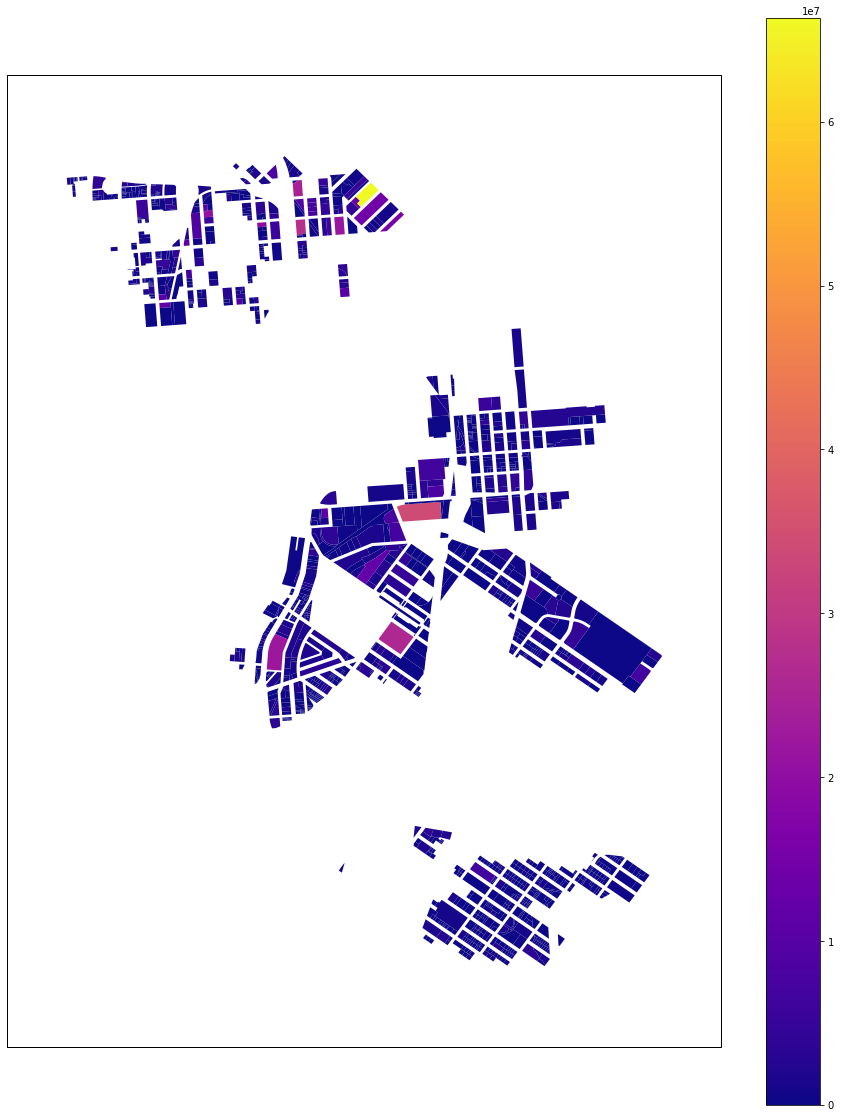

In [37]:
# Mapping land value with a choropleth. 

ax = geoplot.choropleth(cleandata, hue='landvalue3', legend=True, cmap='plasma', figsize=(16, 20), projection=geoplot.crs.Robinson())

ax.outline_patch.set_visible(True)  
plt.show()

In [33]:
cleandata.landvalue3.describe()

count    1.322000e+03
mean     9.829080e+05
std      3.029971e+06
min      0.000000e+00
25%      6.970400e+04
50%      2.685515e+05
75%      8.120185e+05
max      6.635304e+07
Name: landvalue3, dtype: float64

In [ ]:
#getting some basic metrics on land value column

In [34]:
cleandata.landvalue3.median()

268551.5

In [35]:
cleandata.landvalue3.mean()

982908.0075642965

In [36]:
cleandata.to_csv(r'landvalues.csv')